# Introduction

This notebook is the third in our project series and focuses on analyzing clients' credit history with other financial institutions. Specifically, we’ll explore the **"bureau.csv"** dataset, which contains detailed records of all previous credit applications made by our clients with all the other financial institutions that were reported to **Credit Bureau**. Additionally, we’ll dive into related monthly dataset that track history for these previous applications:
* **bureau_balance.csv** Monthly balance of credits in Credit Bureau

## Dataset Overview

### Main Dataset
* **bureau.csv:**
     * **Number of samples**: 1,716,428
     * **Number of features**: 24

### Supporting Monthly Dataset

* **bureau_balance.csv:**
    * **Number of samples:** 27,299,925
    * **Description:** Contains information on monthly balance of credits in Credit Bureau

## Roadmap of the Analysis:
1. **Aggregate Supporting Table to bureau.csv:**
    * Aggregate columns from monthly data table(**bureau_balance.csv**) to enrich the bureau.csv table with relevant features.
2. **Analyze Raw Data in bureau.csv:**
    * Treat Missing Data and Outliers: Address missing values and identify outliers for better data quality.
    * Univariate Analysis: Perform univariate analysis on each column to understand its distribution and potential impact.
3. **Aggregate Features to applications.csv:**
    * Transfer and aggregate relevant features from bureau.csv and supporting table to applications.csv to build a more robust dataset for modeling.
4. **Analyze Feature Associations with Target Variable:**
    * Examine relationships between new features and the target variable to assess predictive potential and guide model-building.
    
## Conclusion from the Analysis of Features from Previous Applications

In total, we analyzed over **1.7 million previous applications**, that were in Credit Bureau. A lot of them had historical data in bureau_balance.csv table. Almost all of the applications are either active or closed. After aggregating the data on a client level, we derived the following key insights:

1. **Default Rate and Loan History**:
    * Past Loan History: Clients who have taken loans in the past tend to have a lower default rate compared to those without previous loans.
2. **Ongoing Loans and Default Rates:**
    * Clients with ongoing loans have a higher chance of default. This is opposite to the clients who have ongoing loan in the Home Credit Group.
4. **Taking prolongation during the contract and Default Rates:**
    * People, who took prolongations for their loans in the past, have a higher default rate.
5. **Debt in the past as a Strong Predictor:**
    * Late Payments: Clients with a history of late payments show a significantly higher likelihood of default.
    * Amount overdue: people, with higher amount of overdue in the past loan are at a higher default risk
    * Amount of debt: higher amount of debt also negatively affects default chances
6. **Amount of credit and Default Rate:**
    * Average amount of credit is lower for people who defaulted

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
sys.path.append(os.path.abspath('..'))
from utils.preprocessing import helper_functions
from utils.feature_engineering import (aggregate_bureau_balance,
                                       aggregate_bureau_data)

In [3]:
application = pd.read_csv("../datasets/application_train.csv")
bureau = pd.read_csv("../datasets/bureau.csv")
bureau_balance = pd.read_csv("../datasets/bureau_balance.csv")

## Aggregate Supporting Table to bureau.csv:

**Features from bureau_balance.csv table:**
* LAST_SNAPSHOT: last month when the information about the credit is available
* CURRENT_STATUS: current status of the credit(meaning the status that was recorded in the last month available)
* HAD_X_DPD: indicator whether there was 1 or 2 or 3 or 4 or 5 on the loan(5 different variables)

In [5]:
bureau = aggregate_bureau_balance(bureau_balance, bureau)

Values of categorical columns

In [8]:
helper_functions.print_unique_values_for_cat_columns(bureau)

---------------------------------------------
CREDIT_ACTIVE
['Closed' 'Active' 'Sold' 'Bad debt']
---------------------------------------------
CREDIT_CURRENCY
['currency 1' 'currency 2' 'currency 4' 'currency 3']
---------------------------------------------
CREDIT_TYPE
['Consumer credit' 'Credit card' 'Mortgage' 'Car loan' 'Microloan'
 'Loan for working capital replenishment' 'Loan for business development'
 'Real estate loan' 'Unknown type of loan' 'Another type of loan'
 'Cash loan (non-earmarked)' 'Loan for the purchase of equipment'
 'Mobile operator loan' 'Interbank credit'
 'Loan for purchase of shares (margin lending)']
---------------------------------------------
HAD_1_DPD
[nan 'NO' 'YES']
---------------------------------------------
HAD_2_DPD
[nan 'NO' 'YES']
---------------------------------------------
HAD_3_DPD
[nan 'NO' 'YES']
---------------------------------------------
HAD_4_DPD
[nan 'NO' 'YES']
---------------------------------------------
HAD_5_DPD
[nan 'NO' 'YES'

Check numeric columns:

In [9]:
bureau.describe()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,LAST_SNAPSHOT
count,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.610875e+06,1.082775e+06,5.919400e+05,1.716428e+06,1.716415e+06,1.458759e+06,1.124648e+06,1.716428e+06,1.716428e+06,4.896370e+05,774354.000000
mean,2.782149e+05,5.924434e+06,-1.142108e+03,8.181666e-01,5.105174e+02,-1.017437e+03,3.825418e+03,6.410406e-03,3.549946e+05,1.370851e+05,6.229515e+03,3.791276e+01,-5.937483e+02,1.571276e+04,-6.062975
std,1.029386e+05,5.322657e+05,7.951649e+02,3.654443e+01,4.994220e+03,7.140106e+02,2.060316e+05,9.622391e-02,1.149811e+06,6.774011e+05,4.503203e+04,5.937650e+03,7.207473e+02,3.258269e+05,15.064299
min,1.000010e+05,5.000000e+06,-2.922000e+03,0.000000e+00,-4.206000e+04,-4.202300e+04,0.000000e+00,0.000000e+00,0.000000e+00,-4.705600e+06,-5.864061e+05,0.000000e+00,-4.194700e+04,0.000000e+00,-95.000000
25%,1.888668e+05,5.463954e+06,-1.666000e+03,0.000000e+00,-1.138000e+03,-1.489000e+03,0.000000e+00,0.000000e+00,5.130000e+04,0.000000e+00,0.000000e+00,0.000000e+00,-9.080000e+02,0.000000e+00,0.000000
50%,2.780550e+05,5.926304e+06,-9.870000e+02,0.000000e+00,-3.300000e+02,-8.970000e+02,0.000000e+00,0.000000e+00,1.255185e+05,0.000000e+00,0.000000e+00,0.000000e+00,-3.950000e+02,0.000000e+00,0.000000
75%,3.674260e+05,6.385681e+06,-4.740000e+02,0.000000e+00,4.740000e+02,-4.250000e+02,0.000000e+00,0.000000e+00,3.150000e+05,4.015350e+04,0.000000e+00,0.000000e+00,-3.300000e+01,1.350000e+04,0.000000
max,4.562550e+05,6.843457e+06,0.000000e+00,2.792000e+03,3.119900e+04,0.000000e+00,1.159872e+08,9.000000e+00,5.850000e+08,1.701000e+08,4.705600e+06,3.756681e+06,3.720000e+02,1.184534e+08,0.000000


Drops rows which don't make sense:
* day of creating application is after the end of application
* days of creating of application is after the planned end date of application
* day of update of application is > 0
* day of update of application is < -5000(these are values around -40 000)

Modify rows:
* where the credit debt is < 0, set it to 0
* where the credit limit is < 0, set it to 0

In [10]:
bureau = bureau[~(bureau["DAYS_CREDIT"] > bureau["DAYS_CREDIT_ENDDATE"])]
bureau = bureau[~(bureau["DAYS_CREDIT"] > bureau["DAYS_ENDDATE_FACT"])]
bureau = bureau[~(bureau["DAYS_CREDIT_UPDATE"] < - 5000)]
bureau = bureau[~(bureau["DAYS_CREDIT_UPDATE"] > 0)]
bureau = bureau[~(bureau["DAYS_CREDIT"] > bureau["DAYS_CREDIT_UPDATE"])]
bureau.loc[bureau["AMT_CREDIT_SUM_DEBT"] < 0, "AMT_CREDIT_SUM_DEBT"] = 0
bureau.loc[bureau["AMT_CREDIT_SUM_LIMIT"] < 0, "AMT_CREDIT_SUM_LIMIT"] = 0

**Missing data**

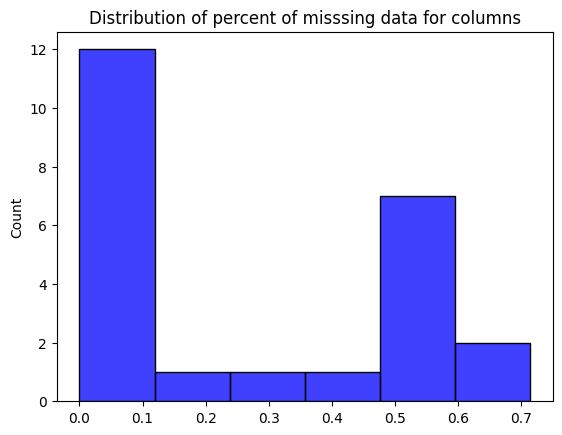

In [11]:
missing_pct = bureau.isnull().sum() / len(bureau)
sns.histplot(missing_pct, color="blue")
plt.title("Distribution of percent of misssing data for columns");

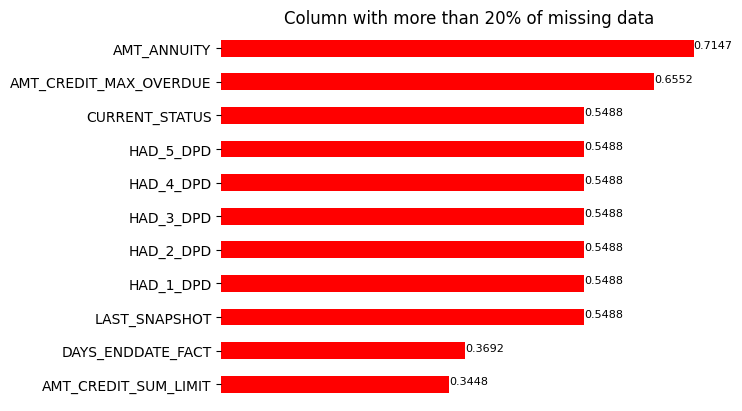

In [12]:
most_missing_data = missing_pct[missing_pct > 0.2]
most_missing_data.sort_values(ascending=True).plot(kind="barh", color="red")
ax = plt.gca()
helper_functions.customize_bar(position="h", axes=ax, round_to=4, values_font=8)
plt.title("Column with more than 20% of missing data");

Our newly created columns have more than 50% of missing data, because for a lot of loans the historical data is absent. In addition, annuity and maximal amount overdues has a lot of missing data.

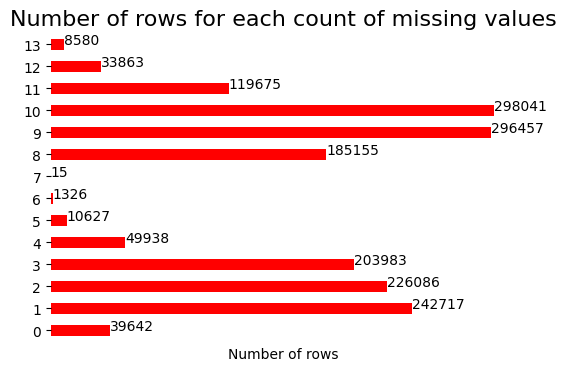

In [13]:
helper_functions.plot_missing_values_by_row(bureau)

Rows, which have 8-12 of missing values are those, which don't have any information in bureau_balance.csv table. In addition, they have a lot of missing data in annuity, enddate of the loan and amount of overdue columns

In [14]:
cat_columns = list(bureau.select_dtypes("object").columns)
bureau[cat_columns] = (bureau[cat_columns].fillna("UNKNOWN"))

## Analysis of the columns in bureau.csv table

**Distribution of Categorical columns**

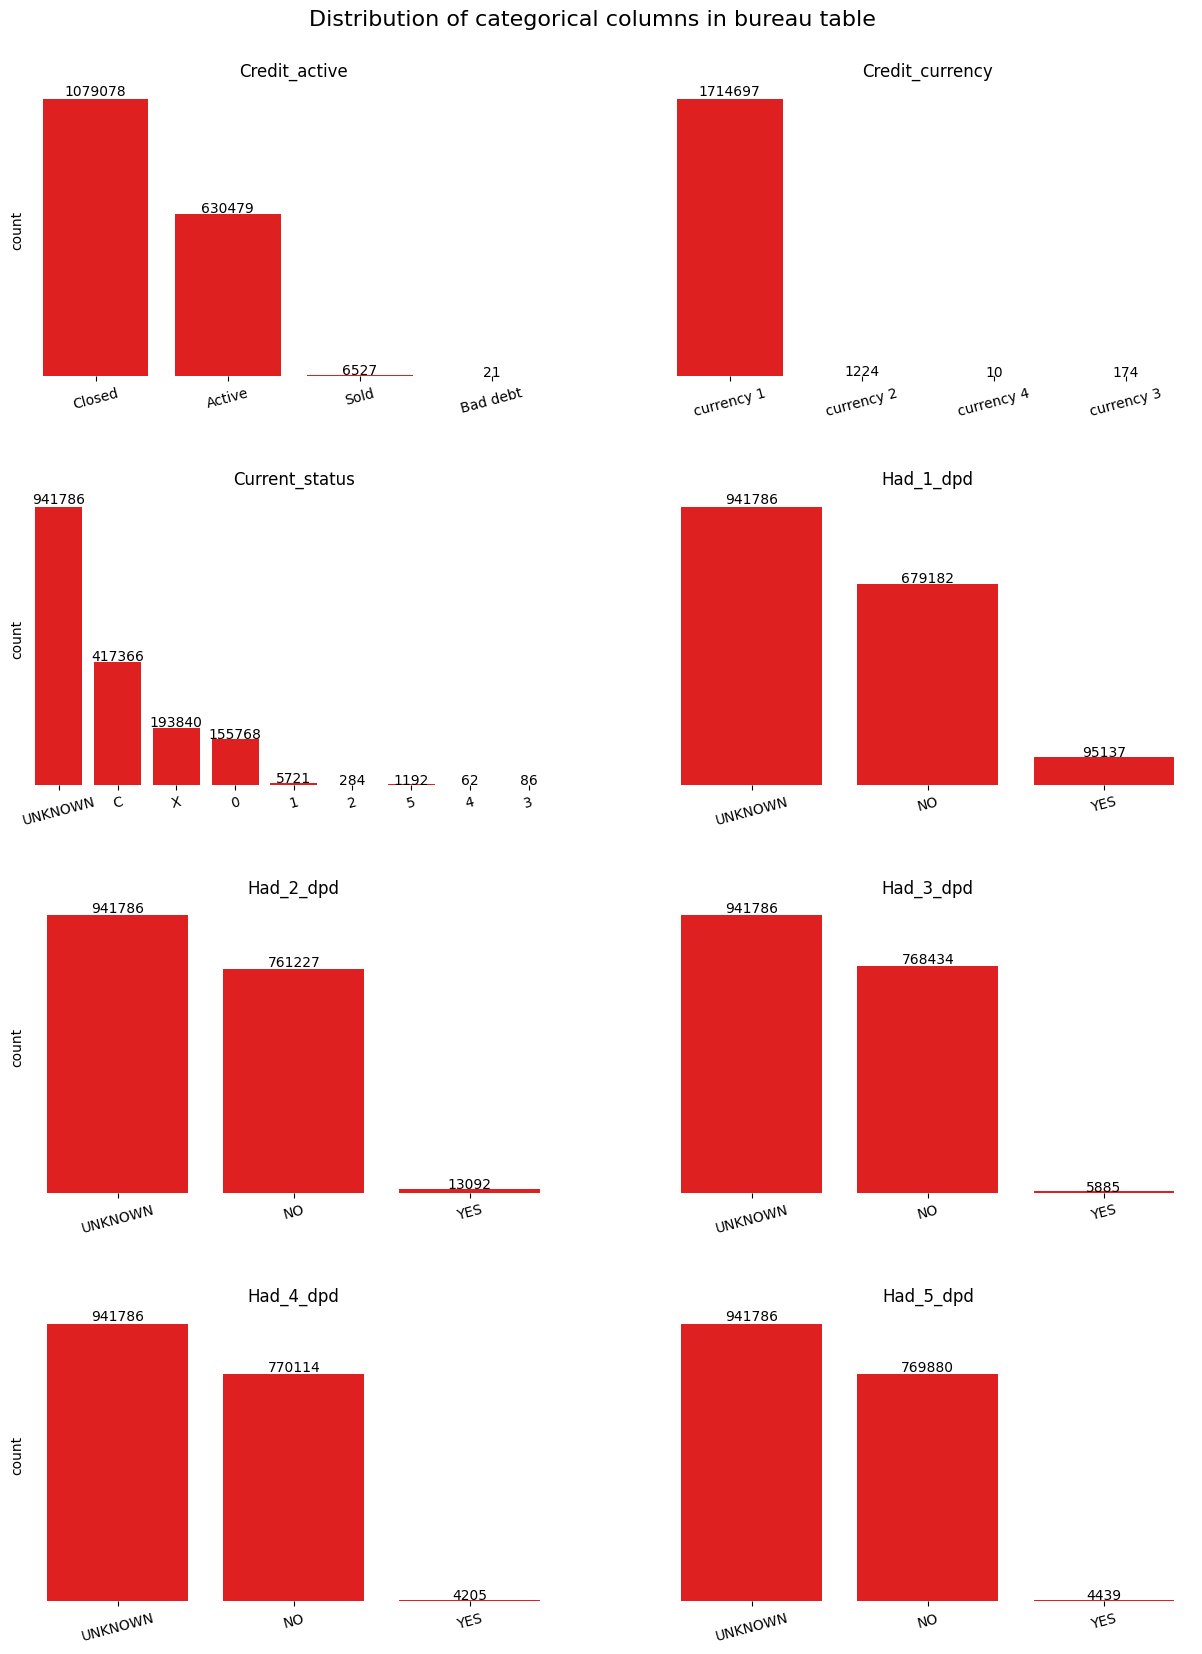

In [15]:
cat_columns = ["CREDIT_ACTIVE", "CREDIT_CURRENCY", 
               "CURRENT_STATUS", "HAD_1_DPD", 
               "HAD_2_DPD", "HAD_3_DPD", 
               "HAD_4_DPD", "HAD_5_DPD"]
title = "Distribution of categorical columns in bureau table"
helper_functions.plot_cat_columns(bureau, cat_columns, col_number=2,
                                  title=title, figsize=(15, 25), rotate=15);

Majority of the credits are either active or closed. Only 21 are bad debt. Most of the credits had only one currency. For those credits, for which the current credit status is known, their status is usually closed. However, there are a lot of ongoing. Some of them have dpd. Features, related to DPD are very skewed. Most of credits didn't have dpd.

**Credit type of the credits**

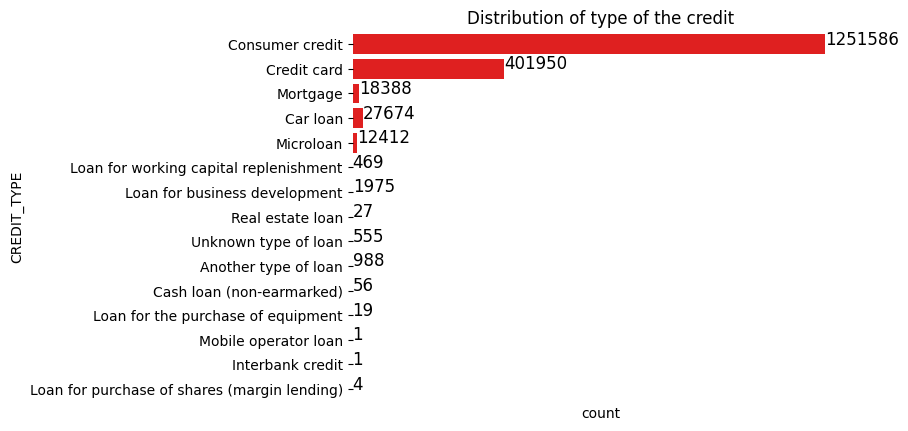

In [16]:
sns.countplot(y="CREDIT_TYPE", data=bureau, color="red")
ax = plt.gca()
helper_functions.customize_bar(position="h", axes=ax)
plt.title("Distribution of type of the credit");

Most of the credits are consumer or revolving. There are a lot of other categories which have very low number of occurences.

**Numerical columns**

We will start with columns, related to days

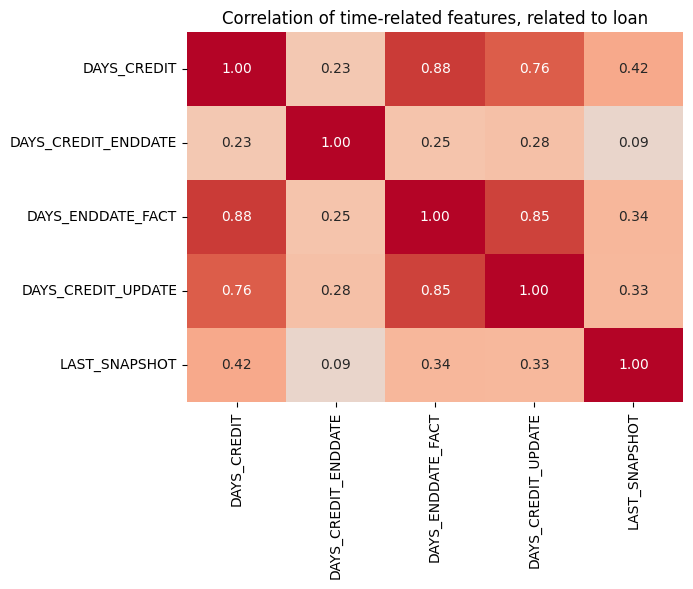

In [17]:
time_cols = ["DAYS_CREDIT", "DAYS_CREDIT_ENDDATE", 
            "DAYS_ENDDATE_FACT", "DAYS_CREDIT_UPDATE", "LAST_SNAPSHOT"]
corr = bureau[time_cols].corr()
plt.title("Correlation of time-related features, related to loan")
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", 
            vmin=-1, vmax=1, cbar=None);

Day, when the credit ended is strongly correlated with the day when the credit started.

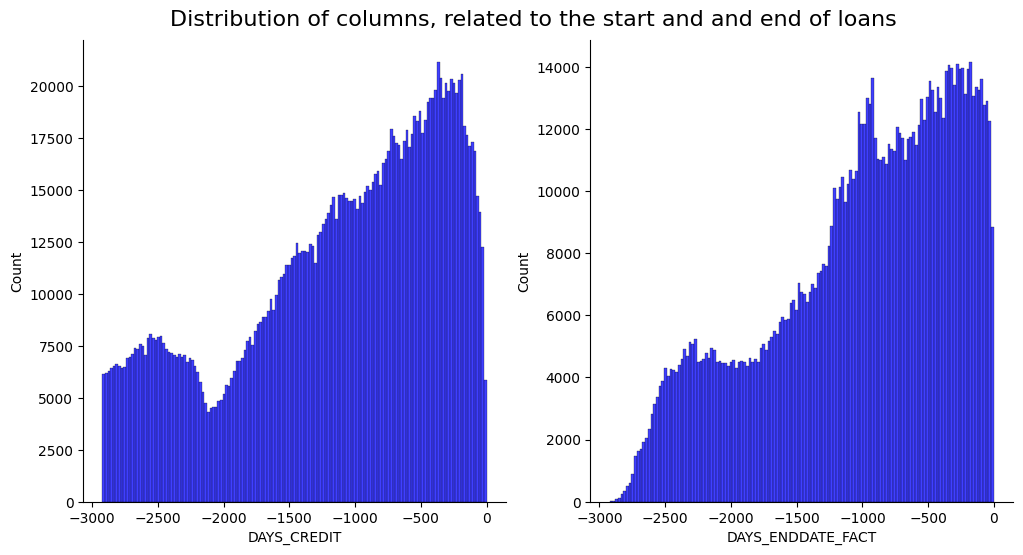

In [18]:
title = "Distribution of columns, related to the start and and end of loans"
helper_functions.plot_num_dist(columns=["DAYS_CREDIT",
                                       "DAYS_ENDDATE_FACT"], 
                               data=bureau, figsize=(12, 6),
                               title=title)

Both of the distributions are bimodal. They are very similar.

Analyse distributions of the following numeric date columns:
* Remaining duration of CB credit (in days) at the time of application in Home Credit
* How many days before loan application did last information about the Credit Bureau credit come
* recent appearence of the loan in the bureau_balance.csv table

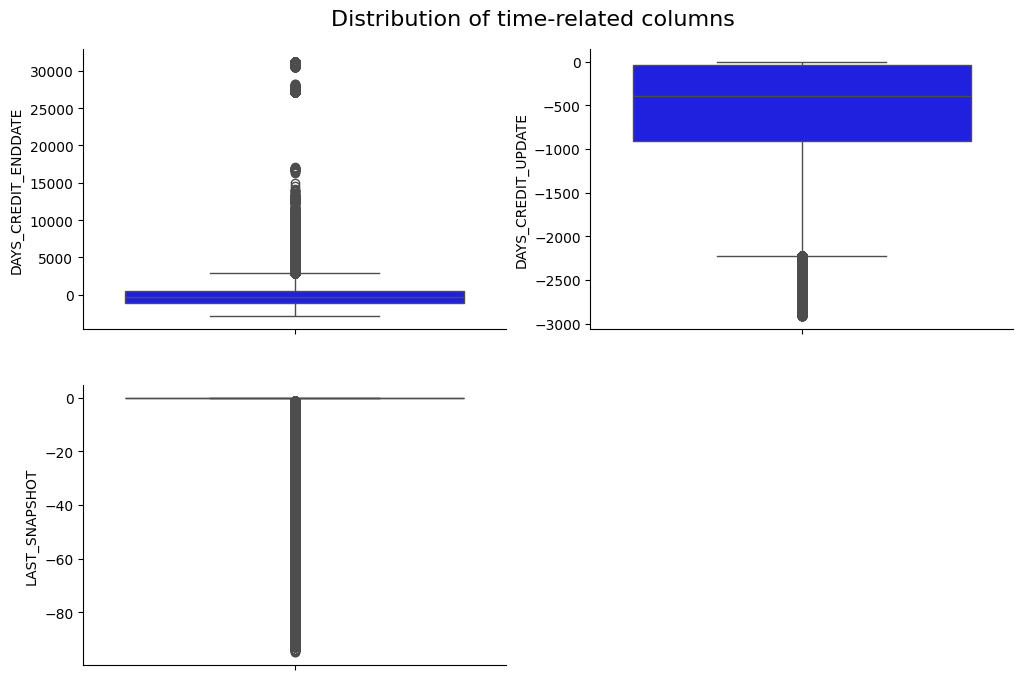

In [19]:
title = "Distribution of time-related columns"
helper_functions.plot_num_dist(columns=["DAYS_CREDIT_ENDDATE",
                                       "DAYS_CREDIT_UPDATE",
                                       "LAST_SNAPSHOT"], 
                               data=bureau, figsize=(12, 8), plot_type="box",
                               title=title)

Most of the loans are have very recent appearance in the bureau_balance.csv table

In [20]:
outliers_enddate = bureau[bureau['DAYS_CREDIT_ENDDATE'] > 20000]
outliers_enddate["CREDIT_ACTIVE"].value_counts(normalize=True)

CREDIT_ACTIVE
Active    0.821132
Closed    0.178348
Sold      0.000520
Name: proportion, dtype: float64

Duration of the loan have some large values(around 30000). Majority of such loans are active. There were found no pattern in such rows. Our idea will be to clap all the outliers to value 10000. 

In [21]:
bureau.loc[bureau['DAYS_CREDIT_ENDDATE'] > 10000, "DAYS_CREDIT_ENDDATE"] = 10000

Less than 2000 rows are marked as active but they have an end date. The current status of such loans is also usually closed or missing. Therefore, mark these rows as not active

In [24]:
bureau.loc[(credit_active_active_mask) & 
           bureau["DAYS_ENDDATE_FACT"].notnull(), "CREDIT_ACTIVE"] = "Closed"
bureau.loc[(credit_active_active_mask) & 
           bureau["DAYS_ENDDATE_FACT"].notnull(), "CURRENT_STATUS"] = "C"

We need to reconcile the columns related to the credit status (Active or Closed). One column comes from the bureau_balance.csv table, and the other comes from the bureau.csv table. There are some rows where the status in one column is marked as "Closed," while in the other column it is marked as "Active," which creates an inconsistency.

This inconsistency arises due to differences in the update times between the two tables. To resolve this, we will use the most recent update to determine the correct status:

* If the update in the bureau.csv table is more recent, the status in the bureau.csv table will take precedence.
* If the update in the bureau_balance.csv table is more recent, the status in the bureau_balance.csv table will take precedence. 

In [26]:
# turn 'DAYS_CREDIT_UPDATE' to months to compare with "LAST_SNAPSHOT"
bureau.loc[:, "MONTHS_CREDIT_UPDATE"] = bureau.loc[:, "DAYS_CREDIT_UPDATE"] / 30.44

current_status_closed_mask = (bureau["CURRENT_STATUS"] == "C")
bureau.loc[(credit_active_active_mask) & 
           (current_status_closed_mask) & 
           (bureau["MONTHS_CREDIT_UPDATE"] < bureau["LAST_SNAPSHOT"]),
           "CREDIT_ACTIVE"] = "Closed"

bureau.loc[(credit_active_active_mask) & 
           (current_status_closed_mask | 
            bureau["CURRENT_STATUS"].isin(["X", "UNKNOWN"])) & 
           (bureau["MONTHS_CREDIT_UPDATE"] > bureau["LAST_SNAPSHOT"]),
           "CURRENT_STATUS"] = "0"

bureau.loc[(bureau["CREDIT_ACTIVE"] == "Closed") & 
           (bureau["CURRENT_STATUS"].isin(["0", "1", "2", "3", "4", "5"])) & 
           (bureau["MONTHS_CREDIT_UPDATE"] < bureau["LAST_SNAPSHOT"]),
           "CREDIT_ACTIVE"] = "Active"

bureau.loc[(bureau["CREDIT_ACTIVE"] == "Closed") & 
           (bureau["CURRENT_STATUS"].isin(["0", "1", "2", "3", "4", "5"])) & 
           (bureau["MONTHS_CREDIT_UPDATE"] > bureau["LAST_SNAPSHOT"]),
           "CURRENT_STATUS"] = "C"

Now, we will analyze the following discrete columns:
* CREDIT_DAY_OVERDUE: Number of days past due on CB credit at the time of application for related loan in our sample
* CNT_CREDIT_PROLONG: How many times was the Credit Bureau credit prolonged

In [27]:
int_cols = ["CREDIT_DAY_OVERDUE", "CNT_CREDIT_PROLONG"]
bureau[int_cols].describe()

,CREDIT_DAY_OVERDUE,CNT_CREDIT_PROLONG
count,1.716105e+06,1.716105e+06
mean,8.174785e-01,6.409864e-03
std,3.653123e+01,9.622395e-02
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00
max,2.792000e+03,9.000000e+00


Both of the distributions are highly skewed. Majority of values in them are 0.

Let's analyze columns, related to money:

In [29]:
amt_cols = ["AMT_CREDIT_MAX_OVERDUE", "AMT_CREDIT_SUM",
           "AMT_CREDIT_SUM_DEBT", "AMT_CREDIT_SUM_LIMIT",
           "AMT_CREDIT_SUM_OVERDUE", "AMT_ANNUITY"]
bureau[amt_cols].describe()

,AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,AMT_ANNUITY
count,5.916900e+05,1.716102e+06,1.458439e+06,1.124380e+06,1.716105e+06,4.896140e+05
mean,3.826729e+03,3.549707e+05,1.371131e+05,6.222998e+03,3.791989e+01,1.571274e+04
std,2.060751e+05,1.149744e+06,6.773300e+05,4.491733e+04,5.938209e+03,3.258345e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,5.130000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,1.255330e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,3.150000e+05,4.015800e+04,0.000000e+00,0.000000e+00,1.350000e+04
max,1.159872e+08,5.850000e+08,1.701000e+08,4.705600e+06,3.756681e+06,1.184534e+08


Most of the columns have 0 values most of the time. All of them have a lot of outliers.

Credit limit is usually 0. For rows, where it is not 0, it is almost always a revolving loan.

Amount of credit can be 0. This happens usually for closed loans or those that are active but revolving.



Create length of the loan feature:

In [30]:
bureau.loc[:, "LOAN_LENGTH"] = (bureau.loc[:, "DAYS_ENDDATE_FACT"]
                                - bureau.loc[:, "DAYS_CREDIT"])

## Aggregate Features to applications.csv:

Here are the features that will be aggregated for our main table:
* APPLICATION_COUNT_BUREAU: how many applications in bureau table each client has
* HAS_ONGOING_LOAN_BUREAU: Does the client have an ongoing loan
* HAD_CONSUMER_LOAN_BUREAU: Did the client have a consumer loan
* HAD_REVOLVING_LOAN_BUREAU: Did the client have a revolving loan
* HAD_PROLONGATION_BUREAU: Did the client had their credit prolonged

* HAD_DPD_BUREAU: Did the client had some DPD for their credit
* HAD_1DPD_BUREAU: Did the client had 1 DPD for their credit
* HAD_2DPD_BUREAU: Did the client had 2 DPD for their credit
* HAD_3DPD_BUREAU: Did the client had 3 DPD for their credit
* HAD_4DPD_BUREAU: Did the client had 4 DPD for their credit
* HAD_5DPD_BUREAU: Did the client had 5 DPD for their credit
* DPD_SUM_BUREAU: sum of all days past due

* HAD_DEBT_BUREAU: Did the client have debt
* SUM_AMT_DEBT_BUREAU: sum of all debt amount

* SUM_AMT_OVERDUE_BUREAU: sum of all amount overdue
* HAD_AMT_OVERDUE_BUREAU: Did the client have amount overdue

* AVG_AMT_CREDIT_SUM_BUREAU: Average credit amount 
* MAX_AMT_CREDIT_SUM_BUREAU: Maximum credit amount the client had
* MAX_AMT_CREDIT_MAX_OVERDUE_BUREAU: What is the client's max maximal amount overdue

* LAST_SNAPSHOT_BUREAU: Last snapshot of the client's loan
* LAST_SNAPSHOT_MEAN_BUREAU: average of last snapshots of client's credits
* AVG_LOAN_LENGTH_BUREAU: Average loan length
* AVG_DAYS_CREDIT_BUREAU: Average days of creating applicatinos
* AVG_DAYS_ENDDATE_FACT_BUREAU: Average days of end of the loan
* MAX_DAYS_CREDIT_BUREAU: Most recent day of creating any application
* MAX_DAYS_ENDDATE_FACT_BUREAU: Most recent day of ending any application

In [32]:
agg_bureau = aggregate_bureau_data(bureau)

## Analyze Feature Associations with Target Variable

In [33]:
# add target variable to the table
application_agg = application[["SK_ID_CURR", "TARGET"]].merge(agg_bureau,
                                                              on="SK_ID_CURR", 
                                                              how="left")

# fill missing data in categorical columns with "UNKNOWN"
cat_columns = list(application_agg.select_dtypes("object").columns)
application_agg[cat_columns] = (application_agg[cat_columns].fillna("UNKNOWN"))

**Association between number of previous applications and the chance of default?**

In [34]:
null_count = application_agg.loc[application_agg["APPLICATION_COUNT_BUREAU"].isnull()]
non_null_count = application_agg.loc[application_agg["APPLICATION_COUNT_BUREAU"].notnull()]
print("Average default chance for people, who don't have bureau information: "
     f"{null_count['TARGET'].mean()}")
print("Average default chance for people, who have bureau information: "
     f"{non_null_count['TARGET'].mean()}")

Average default chance for people, who don't have bureau information: 0.10123563348930177
Average default chance for people, who have bureau information: 0.07730231322466175


Interestingly, those, who don't have bureau applications, have a higher chance of default. It is opposite to what we saw in the previous_applications table

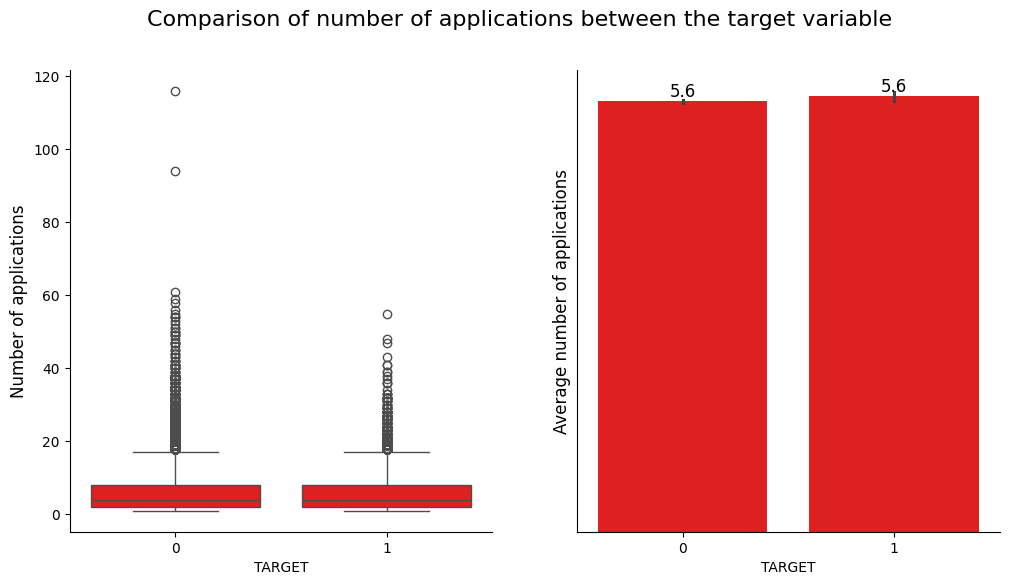

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
plt.suptitle("Comparison of number of applications between the target variable",
            fontsize=16)
sns.boxplot(data=application_agg, y="APPLICATION_COUNT_BUREAU", 
            x="TARGET", ax=ax[0], color="red")
ax[0].set_ylabel("Number of applications", fontsize=12)
ax[1].set_ylabel("Average number of applications", fontsize=12)
sns.barplot(data=application_agg, y="APPLICATION_COUNT_BUREAU", 
            x="TARGET", ax=ax[1], color="red")
helper_functions.customize_bar(axes=ax[1], position="v", round_to=1)
sns.despine();

Regarding the number of applications, it seems similar between the target variable. People with a lot of bureau applications didn't default

**Checking the default rate between having different type of loans in the past, having an ongoing loan, taking prolongation of the loan**

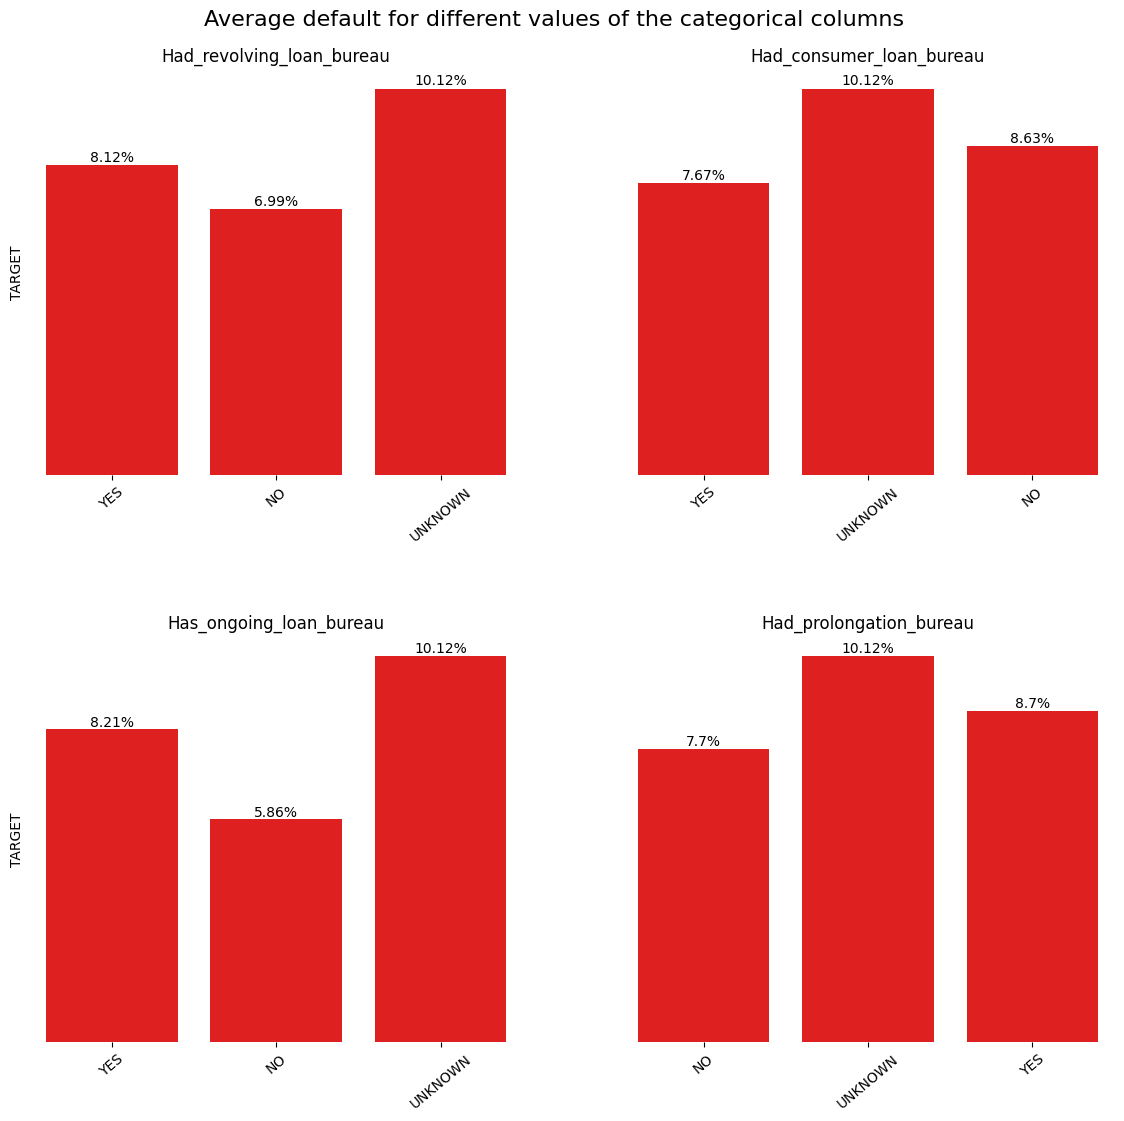

In [40]:
cols = ["HAD_REVOLVING_LOAN_BUREAU", "HAD_CONSUMER_LOAN_BUREAU", 
        "HAS_ONGOING_LOAN_BUREAU", "HAD_PROLONGATION_BUREAU"]
title = "Average default for different values of the categorical columns"
helper_functions.plot_cat_columns(application_agg, cols, col_number=2,
                                   title=title, figsize=(14, 20), rotate=40, 
                                   target="TARGET");

Here, we see that people, who have an ongoing loan, have a higher percent of defaults. In addition, the clients, who took some prolongation in payments, have a higher default percent.

**Check columns, related to DPD or debt**

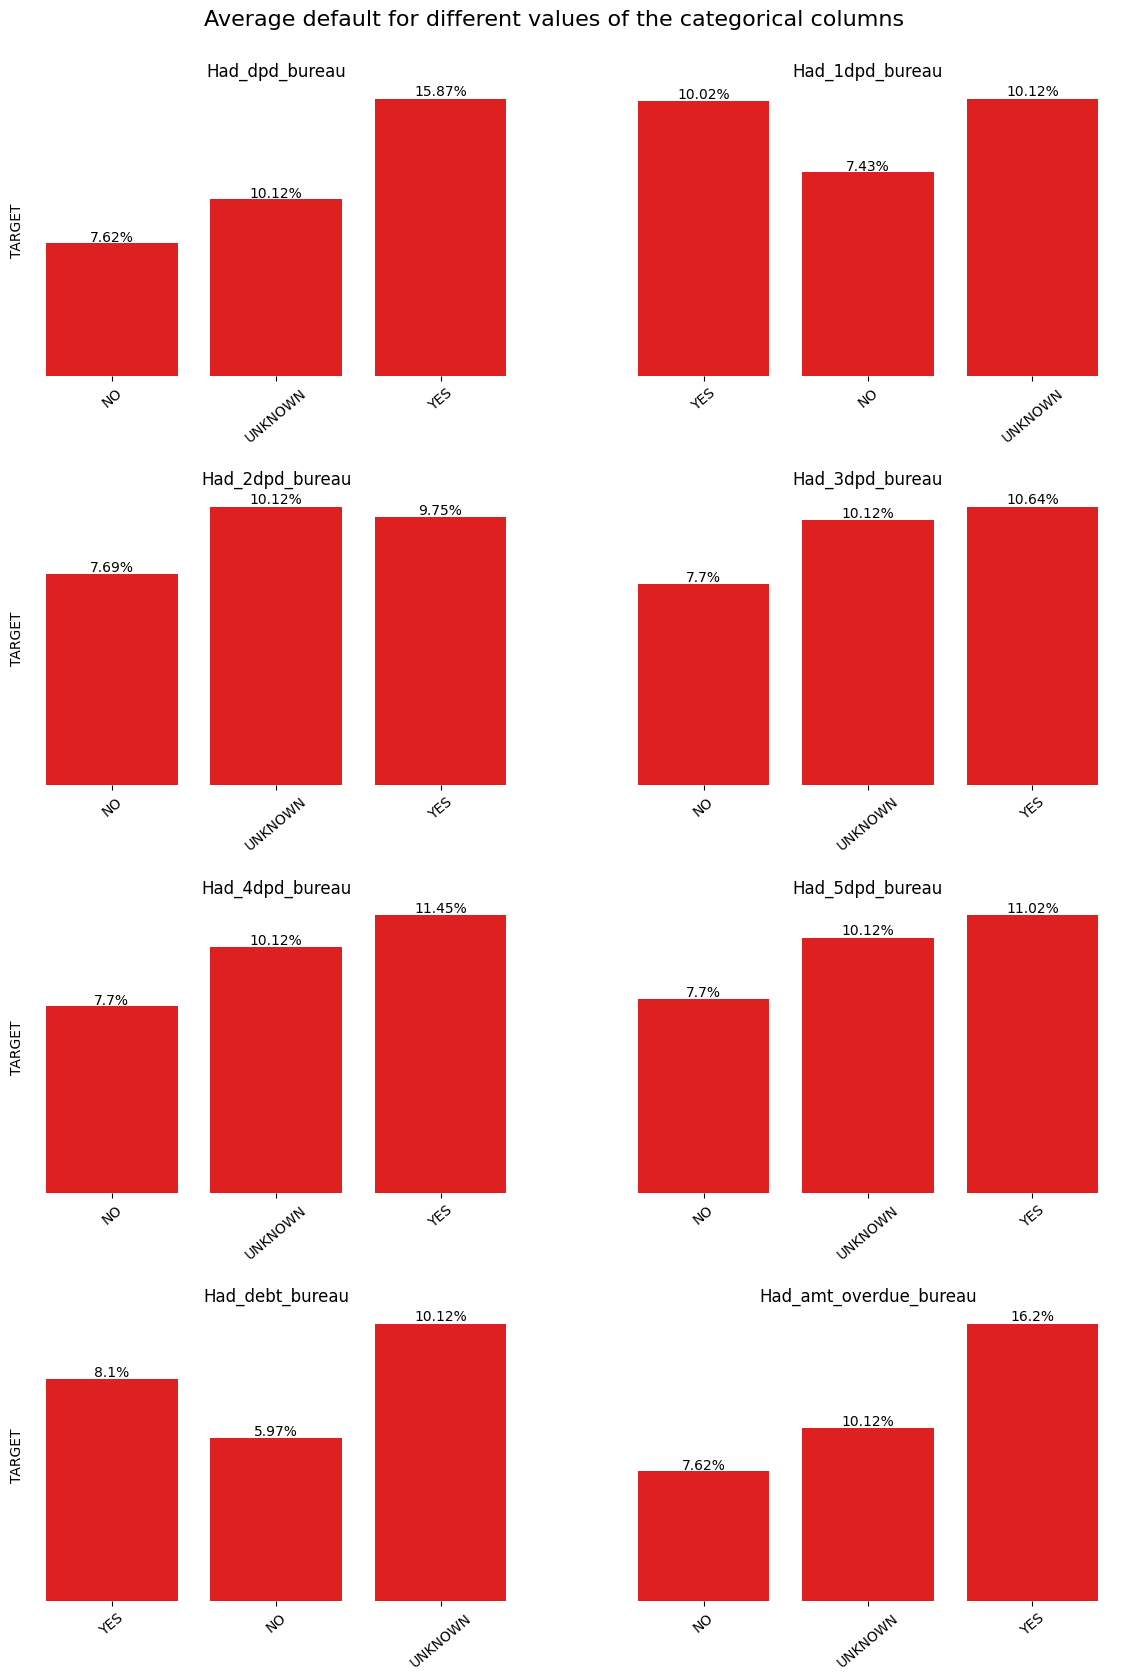

In [41]:
cols = ["HAD_DPD_BUREAU", "HAD_1DPD_BUREAU", 
        "HAD_2DPD_BUREAU", "HAD_3DPD_BUREAU",
       "HAD_4DPD_BUREAU", "HAD_5DPD_BUREAU",
       "HAD_DEBT_BUREAU", "HAD_AMT_OVERDUE_BUREAU"]
title = "Average default for different values of the categorical columns"
helper_functions.plot_cat_columns(application_agg, cols, col_number=2,
                                   title=title, figsize=(14, 25), rotate=40, 
                                   target="TARGET");

Having debt or paying late significantly increases default chance.

**Numerical columns**

The distributions are highly skewed. We will compare their averages 

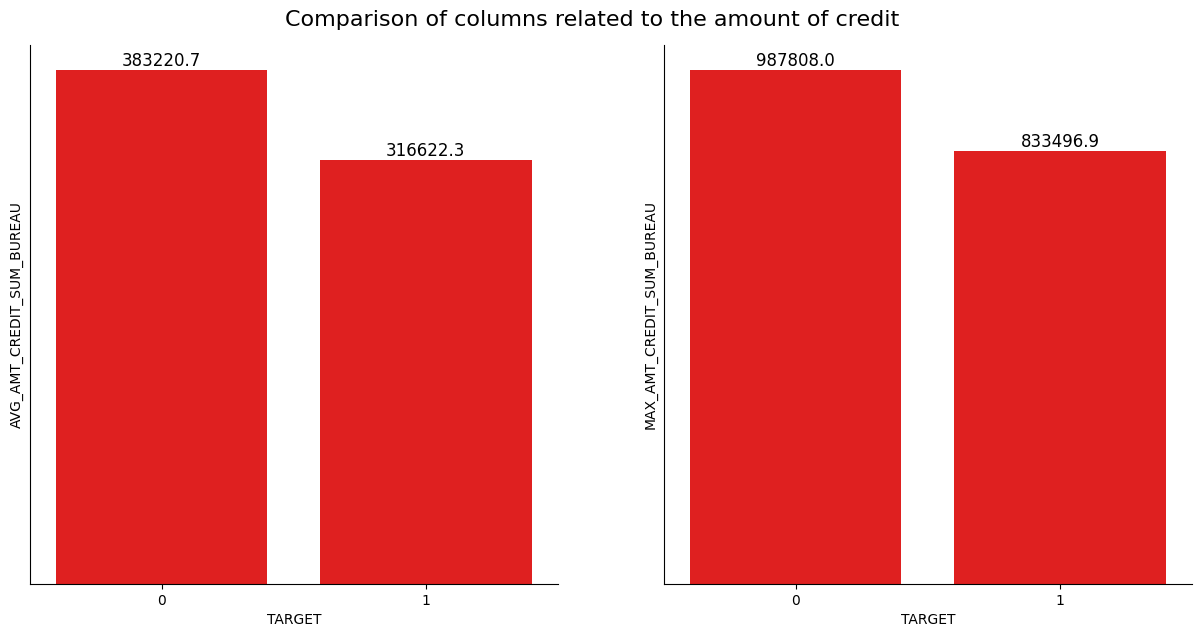

In [42]:
credit_amt_cols = ["AVG_AMT_CREDIT_SUM_BUREAU", 
                  "MAX_AMT_CREDIT_SUM_BUREAU"]
title = "Comparison of columns related to the amount of credit"
helper_functions.plot_num_dist(columns=credit_amt_cols, 
                               data=application_agg, 
                               figsize=(15, 7), 
                               title=title,
                               plot_type="bar",
                               hue="TARGET");

People, who defaulted, took credits with less amount usually.

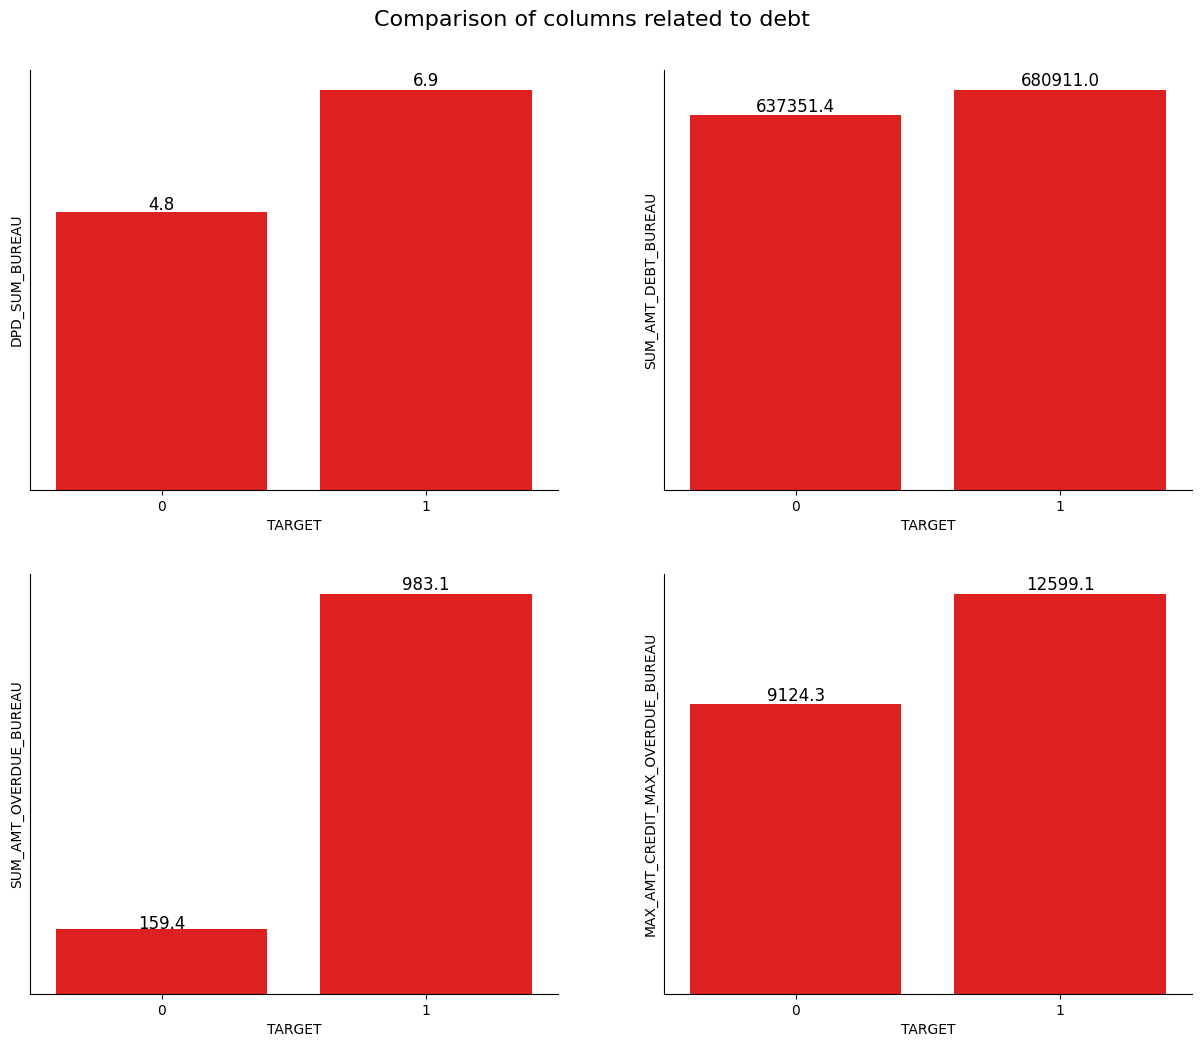

In [43]:
debt_num = ["DPD_SUM_BUREAU", "SUM_AMT_DEBT_BUREAU", 
           "SUM_AMT_OVERDUE_BUREAU", "MAX_AMT_CREDIT_MAX_OVERDUE_BUREAU"]

title = "Comparison of columns related to debt"
helper_functions.plot_num_dist(columns=debt_num, 
                               data=application_agg, 
                               figsize=(15, 12), 
                               title=title,
                               plot_type="bar",
                               hue="TARGET");

The above bar plots indicate how having higher debts correlates with the higher chance of default

**Association of features, related to dates**

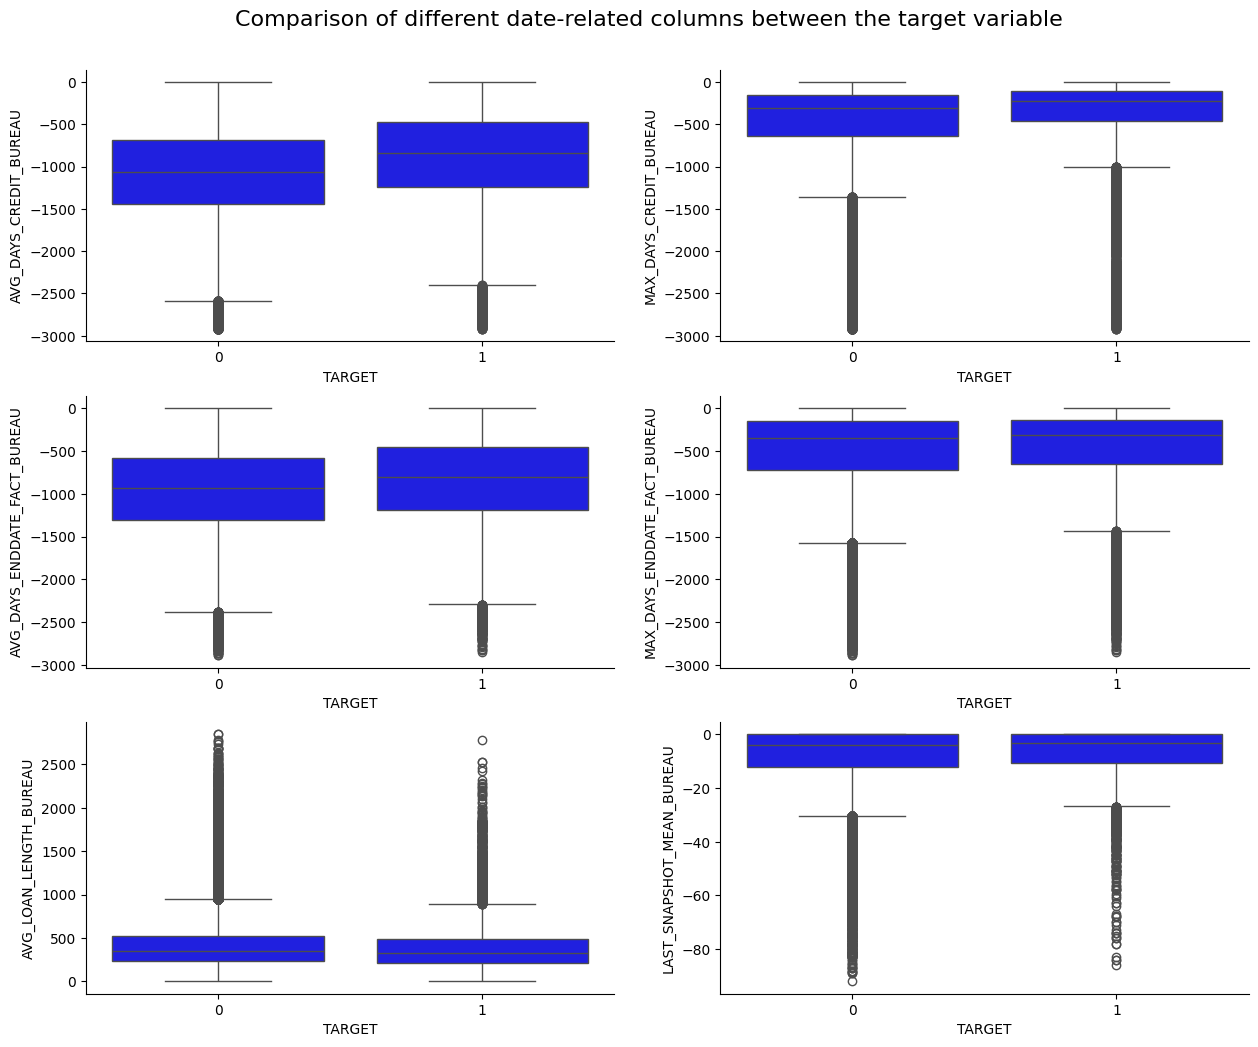

In [44]:
date_cols = ["AVG_DAYS_CREDIT_BUREAU", 
             "MAX_DAYS_CREDIT_BUREAU", 
             "AVG_DAYS_ENDDATE_FACT_BUREAU",
             "MAX_DAYS_ENDDATE_FACT_BUREAU",
             "AVG_LOAN_LENGTH_BUREAU",
             "LAST_SNAPSHOT_MEAN_BUREAU"]
title = "Comparison of different date-related columns between the target variable"
helper_functions.plot_num_dist(columns=date_cols, 
                               data=application_agg, 
                               figsize=(15, 12), 
                               title=title,
                               plot_type="box",
                               hue="TARGET");

None of the column seem to have some difference between the target variable

Turn negative columns to positive, so that logarithmic transformation could be applied to these columns:

In [48]:
agg_bureau["AVG_DAYS_CREDIT_BUREAU"] = - agg_bureau["AVG_DAYS_CREDIT_BUREAU"]
agg_bureau["AVG_DAYS_ENDDATE_FACT_BUREAU"] = - agg_bureau["AVG_DAYS_ENDDATE_FACT_BUREAU"]
agg_bureau["MAX_DAYS_ENDDATE_FACT_BUREAU"] = - agg_bureau["MAX_DAYS_ENDDATE_FACT_BUREAU"]
agg_bureau["MAX_DAYS_CREDIT_BUREAU"] = - agg_bureau["MAX_DAYS_CREDIT_BUREAU"]
agg_bureau["LAST_SNAPSHOT_MEAN_BUREAU"] = - agg_bureau["LAST_SNAPSHOT_MEAN_BUREAU"]
agg_bureau["LAST_SNAPSHOT_MAX_BUREAU"] = - agg_bureau["LAST_SNAPSHOT_MAX_BUREAU"]

In [49]:
agg_bureau.to_csv("bureau_agg_features.csv")

## Conclusion from the Analysis of Features from Previous Applications

In total, we analyzed over **1.7 million previous applications**, that were in Credit Bureau. A lot of them had historical data in bureau_balance.csv table. Almost all of the applications are either active or closed. After aggregating the data on a client level, we derived the following key insights:

1. **Default Rate and Loan History**:
    * Past Loan History: Clients who have taken loans in the past tend to have a lower default rate compared to those without previous loans.
2. **Ongoing Loans and Default Rates:**
    * Clients with ongoing loans have a higher chance of default. This is opposite to the clients who have ongoing loan in the Home Credit Group.
4. **Taking prolongation during the contract and Default Rates:**
    * People, who took prolongations for their loans in the past, have a higher default rate.
5. **Debt in the past as a Strong Predictor:**
    * Late Payments: Clients with a history of late payments show a significantly higher likelihood of default.
    * Amount overdue: people, with higher amount of overdue in the past loan are at a higher default risk
    * Amount of debt: higher amount of debt also negatively affects default chances
6. **Amount of credit and Default Rate:**
    * Average amount of credit is lower for people who defaulted